## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
charity_df = application_df.drop(columns = ["EIN","NAME"])
charity_df 

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
charity_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = charity_df["APPLICATION_TYPE"].value_counts()
application_type_counts 

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_counts[application_type_counts < 500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [6]:

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = charity_df["CLASSIFICATION"].value_counts()
class_counts 

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts_bin = class_counts[class_counts>1]
class_counts_bin

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_counts[class_counts<100].index) 
classifications_to_replace

['C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [10]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
charity_df_dummies = pd.get_dummies(charity_df)
charity_df_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays
y = charity_df_dummies["IS_SUCCESSFUL"]
X = charity_df_dummies.drop(columns = ["IS_SUCCESSFUL"])
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features =  X_train.shape[1]
nn = tf.keras.models.Sequential()
hidden_nodes_layer1 = 6
hidden_nodes_layer2 = 9

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = number_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 702       
                                                                 
 dense_1 (Dense)             (None, 9)                 63        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________


In [15]:
X_train.shape[1]

116

In [16]:
# Compile the model
nn.compile(loss ="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
804/804 [==============================] - 1s 823us/step - loss: 0.6006 - accuracy: 0.7063
Epoch 2/100
804/804 [==============================] - 1s 816us/step - loss: 0.5646 - accuracy: 0.7241
Epoch 3/100
804/804 [==============================] - 1s 798us/step - loss: 0.5585 - accuracy: 0.7273
Epoch 4/100
804/804 [==============================] - 1s 793us/step - loss: 0.5549 - accuracy: 0.7272
Epoch 5/100
804/804 [==============================] - 1s 803us/step - loss: 0.5528 - accuracy: 0.7289
Epoch 6/100
804/804 [==============================] - 1s 790us/step - loss: 0.5516 - accuracy: 0.7292
Epoch 7/100
804/804 [==============================] - 1s 801us/step - loss: 0.5505 - accuracy: 0.7287
Epoch 8/100
804/804 [==============================] - 1s 798us/step - loss: 0.5496 - accuracy: 0.7291
Epoch 9/100
804/804 [==============================] - 1s 791us/step - loss: 0.5487 - accuracy: 0.7299
Epoch 10/100
804/804 [==============================] - 1s 801us/step - l

804/804 [==============================] - 1s 795us/step - loss: 0.5403 - accuracy: 0.7352
Epoch 80/100
804/804 [==============================] - 1s 795us/step - loss: 0.5404 - accuracy: 0.7352
Epoch 81/100
804/804 [==============================] - 1s 806us/step - loss: 0.5403 - accuracy: 0.7351
Epoch 82/100
804/804 [==============================] - 1s 793us/step - loss: 0.5400 - accuracy: 0.7352
Epoch 83/100
804/804 [==============================] - 1s 794us/step - loss: 0.5399 - accuracy: 0.7353
Epoch 84/100
804/804 [==============================] - 1s 791us/step - loss: 0.5397 - accuracy: 0.7363
Epoch 85/100
804/804 [==============================] - 1s 795us/step - loss: 0.5401 - accuracy: 0.7344
Epoch 86/100
804/804 [==============================] - 1s 800us/step - loss: 0.5397 - accuracy: 0.7356
Epoch 87/100
804/804 [==============================] - 1s 795us/step - loss: 0.5399 - accuracy: 0.7358
Epoch 88/100
804/804 [==============================] - 1s 794us/step - loss:

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5517 - accuracy: 0.7301 - 287ms/epoch - 1ms/step
Loss: 0.5517410635948181, Accuracy: 0.7301457524299622


# Report

### Overview
The purpose of this analysis is to use deep learning and neural network for Alphabet Soup foundation to select applicants with the best chance of success 

### Results
__Data Preprocessing__
- EIN and NAME were dropped because of revelancy issues.  CLASSIFICATIONS and APPLICATION_TYPES have to be clean up because of the high fluctuations in the dataset. The target variable is "IS_SUCCESSFUL". The features are the rest of the columns are features.  Moreover, categorial variables were transformed by "pd.get_dummies()"

__Compiling, Training, and Evaluating the Model__
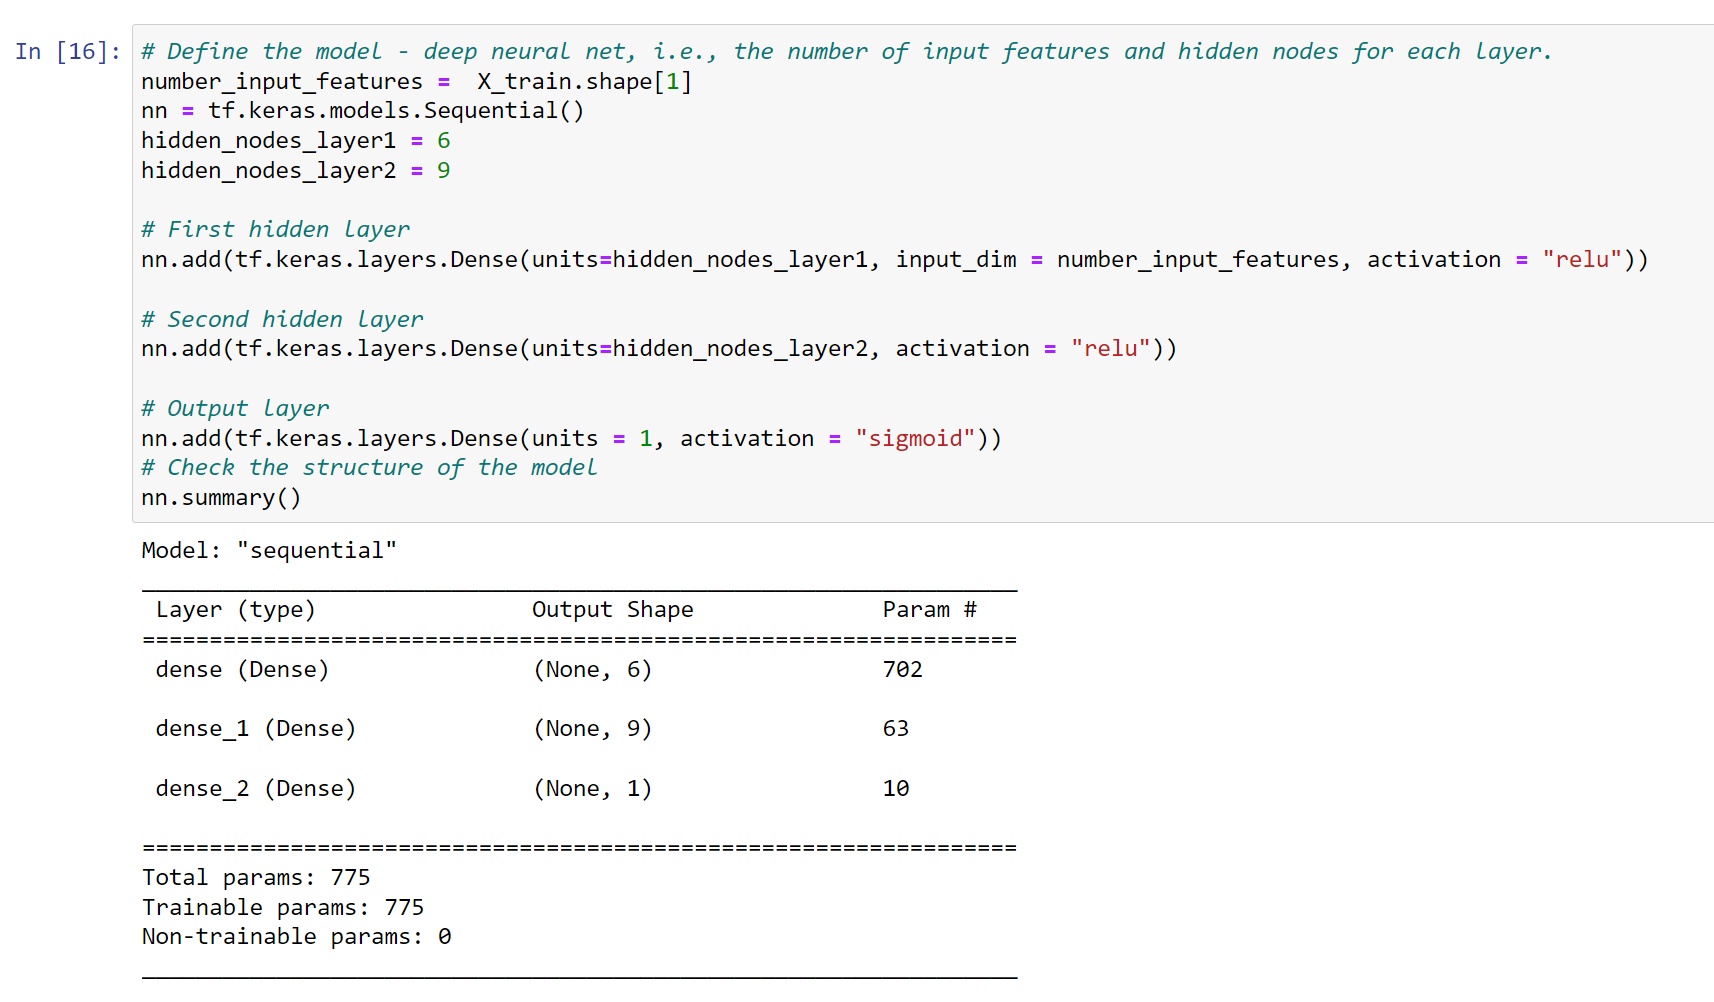
- Neural Network is used on each hidden layer for a total of 2 layers.  The number of inputs are equal to the total amount of features. The two-layer model generated a 73% percent accuracy with 55.59% loss with 775 parameters. 



### Summary
Our model has a high amount of loss and high accuracy, so that means we have a few big errors in our model.  We can perhaps add an additional layer to the model to improve on accuracy and minimise loss. 


In [19]:
# Export our model to HDF5 file
# from google.colab import files
from keras.models import load_model

nn.save('storeh5file/Charity_Funding.h5')
# nn.download('/Homework/Charity_Funding.h5')